IMPORTING LIBRARIES

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

CREATING BANDIT ENVIRONMENT FOR SOFTMAX ALGORITHM

In [4]:
class Bandit_Environment(object):
    def __init__(self, q_values, true_optimal_arms):
        #if len(reward_probas) != len(rewards):
            #raise Exception(f"size of reward probas : {len(reward_probas)} does not match size of rewards: {len(rewards)}")
            
        self.q_values = q_values #qtrue bandit problem x number of arms []
        #self.rewards = rewards  # 
        self.k_arms  = len(q_values[0]) #length of rows in  bandit problem x number of arms []
        self.true_optimal_arms = true_optimal_arms
        self.number_of_bandit_problem = len(q_values) #length of columns in  bandit problem x number of arms []
        

CREATING SOFTMAX AGENT

In [5]:
class SoftmaxAgent(object):
    def __init__(self, env, max_iterations, temperature, temperature_color):
        self.env = env 
        self.iterations = max_iterations
        self.temperature = temperature
        self.temperature_color = temperature_color
        
        
    def execute(self):
       
        fig1=plt.figure().add_subplot(111)
        fig2=plt.figure().add_subplot(111)
        
      
        for temp in range(len(temperature)):
            print("using temperature value : ", self.temperature[temp])
            
            Q_values = np.zeros((self.env.number_of_bandit_problem, self.env.k_arms)) #reward estimated
            arm_counts = np.ones((self.env.number_of_bandit_problem, self.env.k_arms))#number of times each arm was pulled. #each arm is pulled atleast once
            Q_at_i = np.random.normal(self.env.q_values, 1)#initial pulling of all arms where i = 1
        
     
            reward_temp = []
            reward_temp.append(0) #Q at 0 
            reward_temp.append(np.mean(Q_at_i)) #Q at 1
            reward_temp_optimal = []
            
            for iteration in range(2, self.iterations + 1):
                actual_rewards =[] # all rewards in this pull/time-step
                optimal_arm_pull_count  = 0 # number of pulls of best arm in this time step
                
                for bp in range(self.env.number_of_bandit_problem):
                    exp_Q = np.exp(Q_values[bp]/temperature[temp])
                    sfx_Q = exp_Q/np.sum(exp_Q) # softmax probabilities
                    arm = np.random.choice(range(self.env.k_arms), 1, p = sfx_Q) # picks one arm based on softmax probability
                    
                    
                    if arm == self.env.true_optimal_arms[bp]:
                        optimal_arm_pull_count = optimal_arm_pull_count+1 #add one to optimal arm count if the selected arm is the optimal arm
                   
                    reward = np.random.normal(self.env.q_values[bp][arm],1)
                    
                    actual_rewards.append(reward)
                    
                    arm_counts[bp][arm] = arm_counts[bp][arm]+1
                    
                    Q_values[bp][arm] = Q_values[bp][arm] + (reward - Q_values[bp][arm]) / arm_counts[bp][arm]
                    
                    
                avg_actual_rewards = np.mean(actual_rewards)
                reward_temp.append(avg_actual_rewards)
                reward_temp_optimal.append(float(optimal_arm_pull_count) * 100  / self.env.number_of_bandit_problem)
            
           
            fig1.plot(range(0,self.iterations + 1),reward_temp,self.temperature_color[temp])
            fig2.plot(range(2,self.iterations + 1),reward_temp_optimal,self.temperature_color[temp])
            
        #print(reward_temperature[temp])
        #print(reward_optimal_temperature[temp])
            
            
        plt.rc('text',usetex=False)
        fig1.title.set_text('Softmax : Average Reward Vs Steps for 10 arms')
        fig1.set_ylabel('Average Reward')
        fig1.set_xlabel('Steps')
        fig1.legend((r"$T=$"+str(temperature[0]),r"$T=$"+str(temperature[1]),r"$T=$"+str(temperature[2]),r"$T=$"+str(temperature[3])))
        fig2.title.set_text(r'Softmax : $\%$ Optimal Action Vs Steps for 10 arms')
        fig2.set_ylabel(r'$\%$ Optimal Action')
        fig2.set_xlabel('Steps')
        fig2.set_ylim(0,100)
        fig2.legend((r"$T=$"+str(temperature[0]),r"$T=$"+str(temperature[1]),r"$T=$"+str(temperature[2]),r"$T=$"+str(temperature[3])))
        plt.show()


RUNNING THE SOFTMAX ALGORITHM

using temperature value :  0.01
using temperature value :  0.1
using temperature value :  1
using temperature value :  10


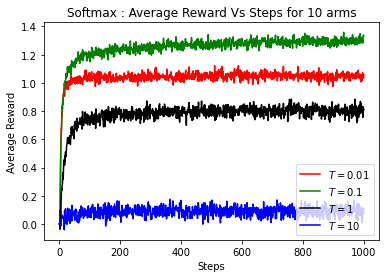

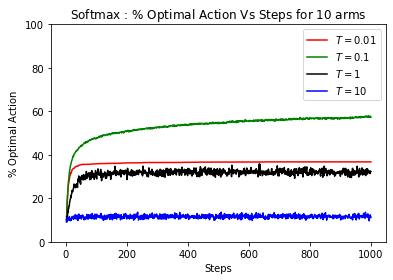

In [6]:
temperature =[0.01,0.1,1,10]
temperature_color=['r','g','k','b']
bandit_problem = 2000
no_of_arms = 10
iterations = 1000
q_values= np.random.normal(0,1,(bandit_problem ,no_of_arms))  #qtrue
true_optimal_arms = np.argmax(q_values,1)

environment = Bandit_Environment(q_values = q_values, true_optimal_arms = true_optimal_arms)
softmaxAgent = SoftmaxAgent(env = environment, max_iterations = iterations, temperature = temperature, temperature_color = temperature_color)


play_softmax_history = softmaxAgent.execute()


